In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
for dirname, _, filenames in os.walk('/Documents/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
os.getcwd()

'c:\\Users\\HP\\Documents\\SBP'

In [7]:
df = pd.read_csv("USARemittanceMonthly.csv")
df.drop('Series Key', axis=1 , inplace=True)
df.drop('Series', axis=1 , inplace=True)
df.drop('Unit', axis=1 , inplace=True)
df.drop('Observation Status', axis=1 , inplace=True)
df.head()

,Observation Date,Observation Value
0,7/31/1972,0.6
1,8/31/1972,0.8
2,9/30/1972,0.7
3,10/31/1972,0.8
4,11/30/1972,0.7


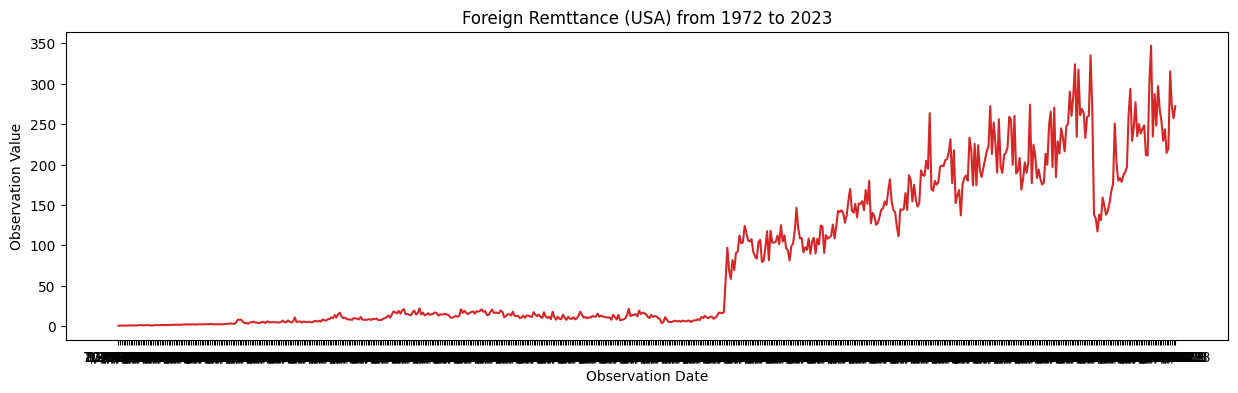

In [8]:
def plot_df(df, x, y, title="", xlabel='Observation Date', ylabel='Observation Value', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Observation Date'], y=df['Observation Value'], title='Foreign Remttance (USA) from 1972 to 2023')

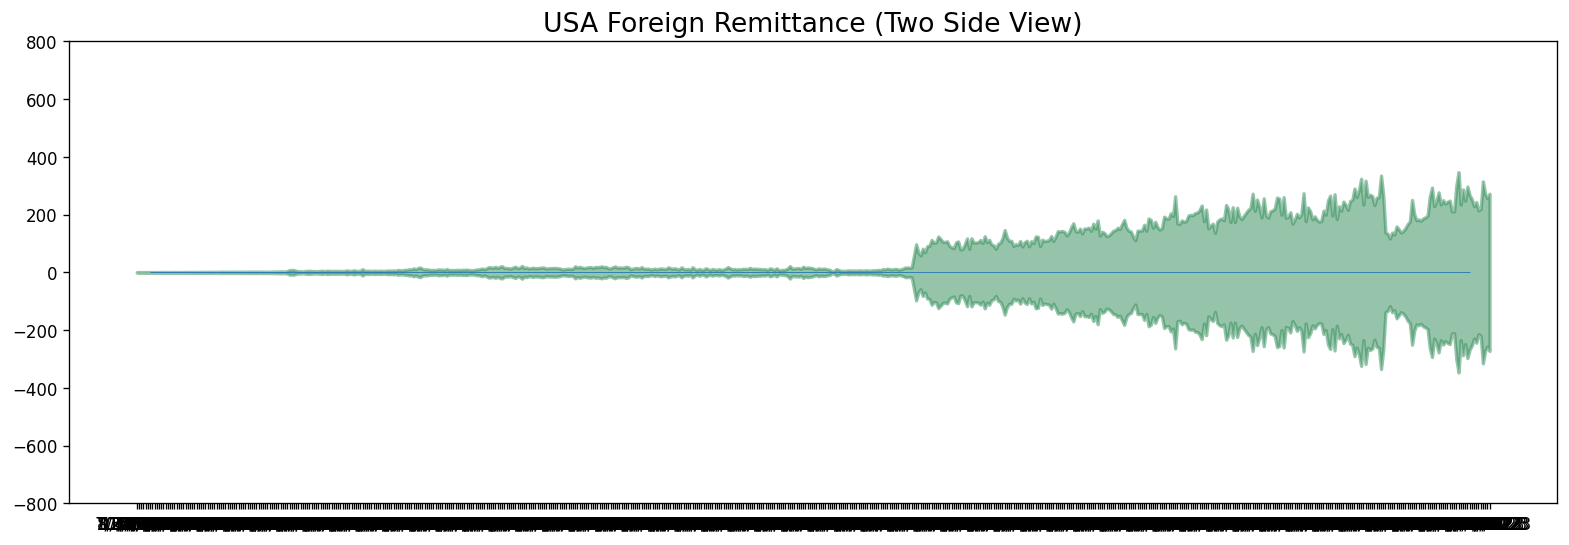

In [9]:
x = df['Observation Date'].values
y1 = df['Observation Value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('USA Foreign Remittance (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Observation Date']), xmax=np.max(df['Observation Date']), linewidth=.5)
plt.show()

In [10]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse



C:\Users\HP\AppData\Local\Temp\ipykernel_4196\2430341367.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


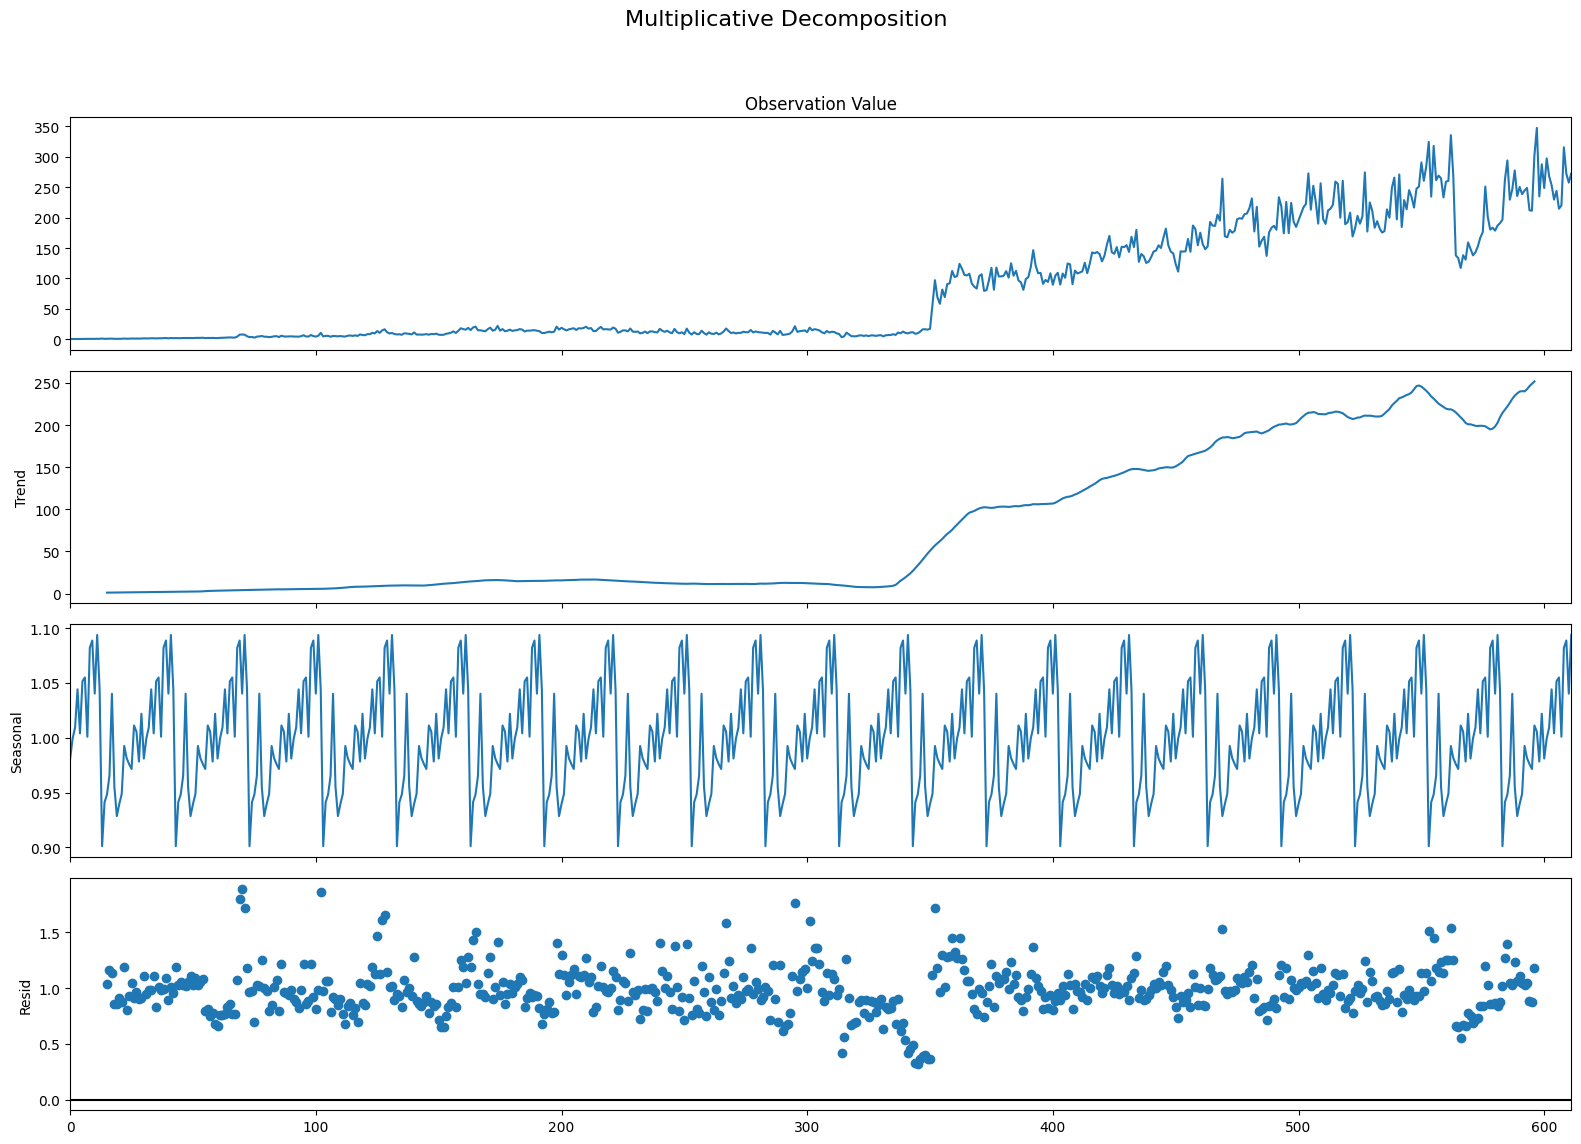

In [11]:
multiplicative_decomposition = seasonal_decompose(df['Observation Value'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\1303774787.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


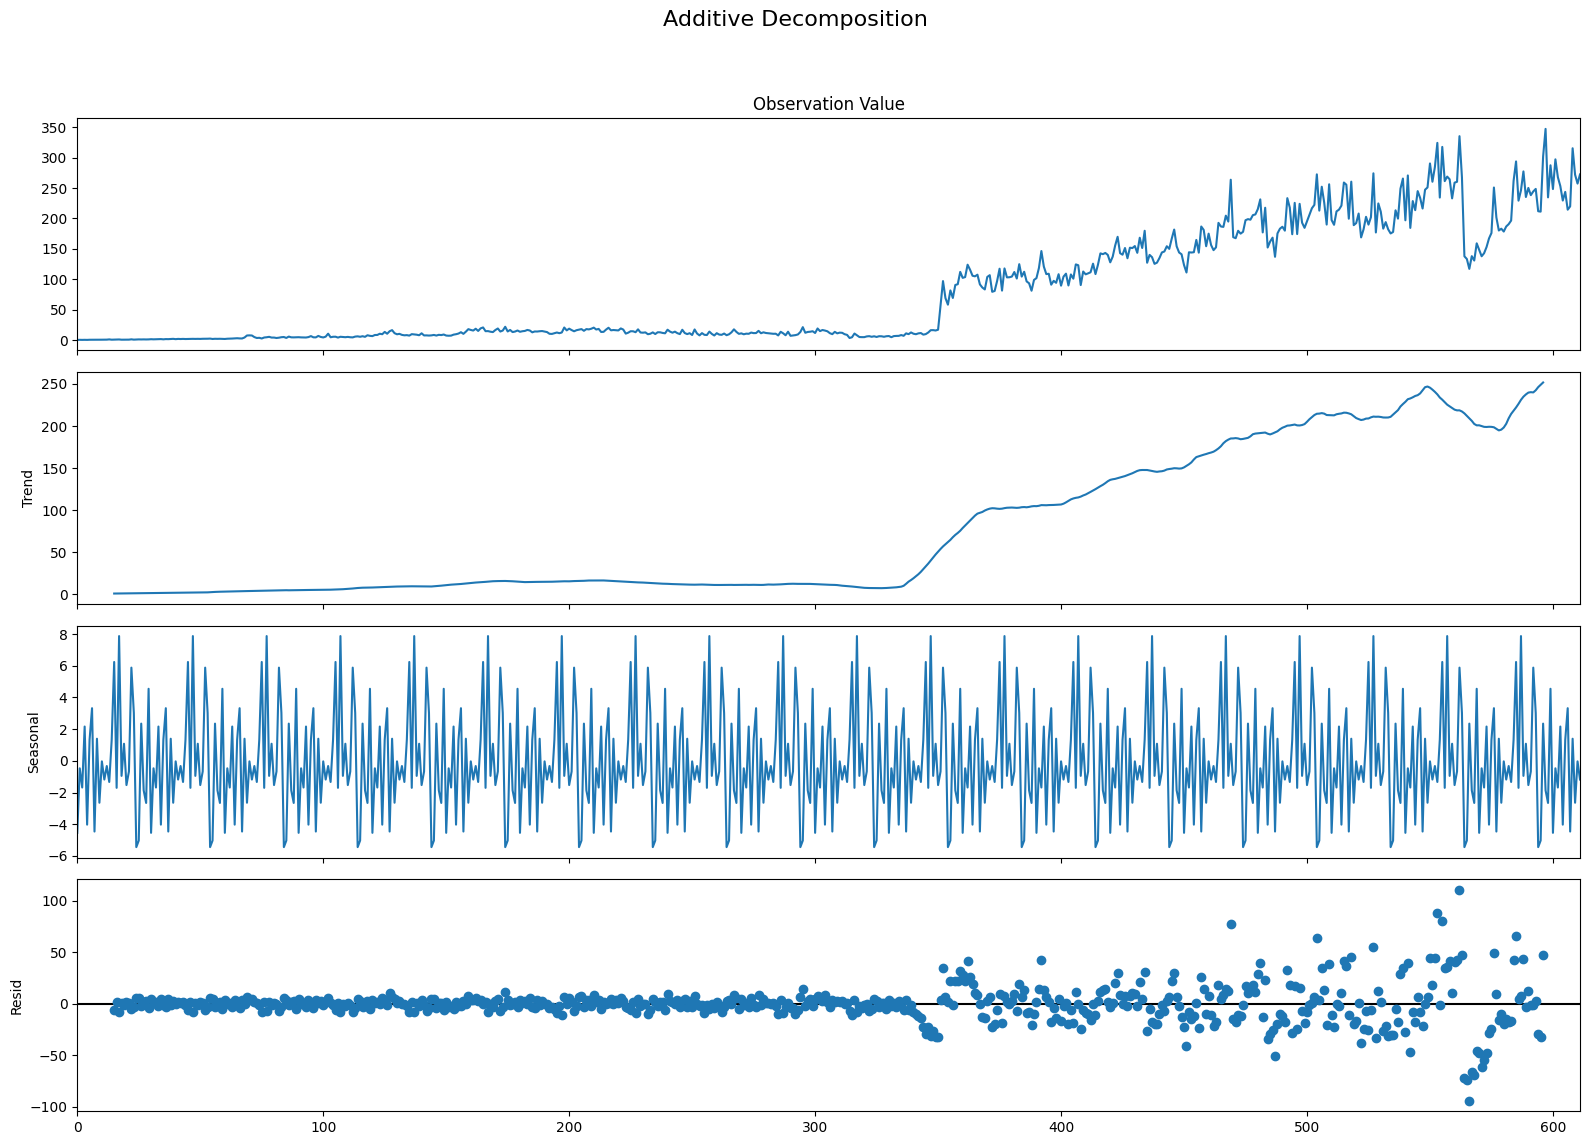

In [12]:
additive_decomposition = seasonal_decompose(df['Observation Value'], model='additive', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Observation Value detrended by subtracting the least squares fit')

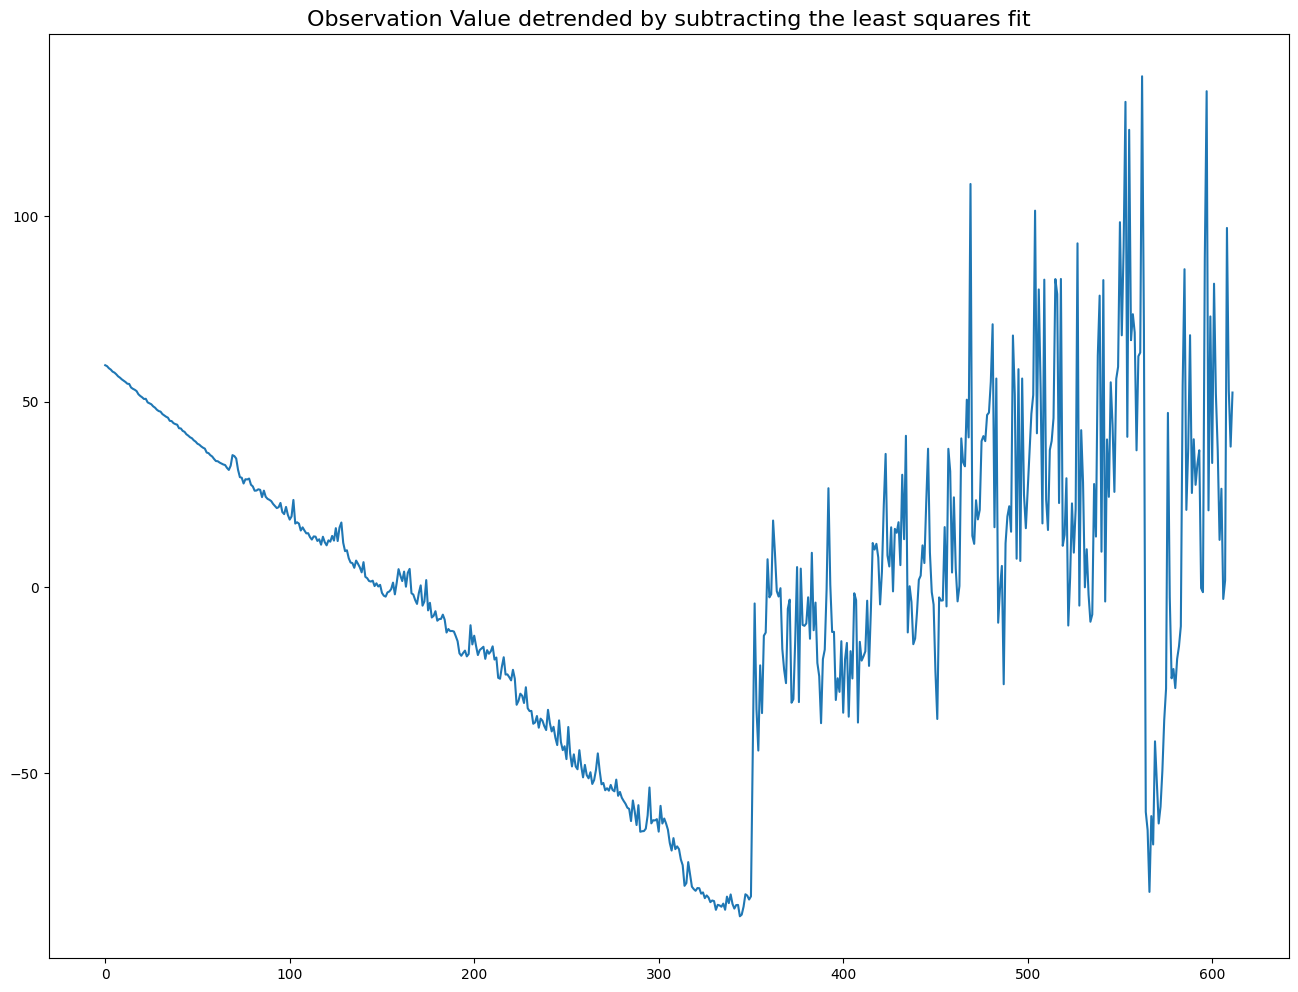

In [13]:
from scipy import signal
detrended = signal.detrend(df['Observation Value'].values)
plt.plot(detrended)
plt.title('Observation Value detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Observation Value detrended by subtracting the trend component')

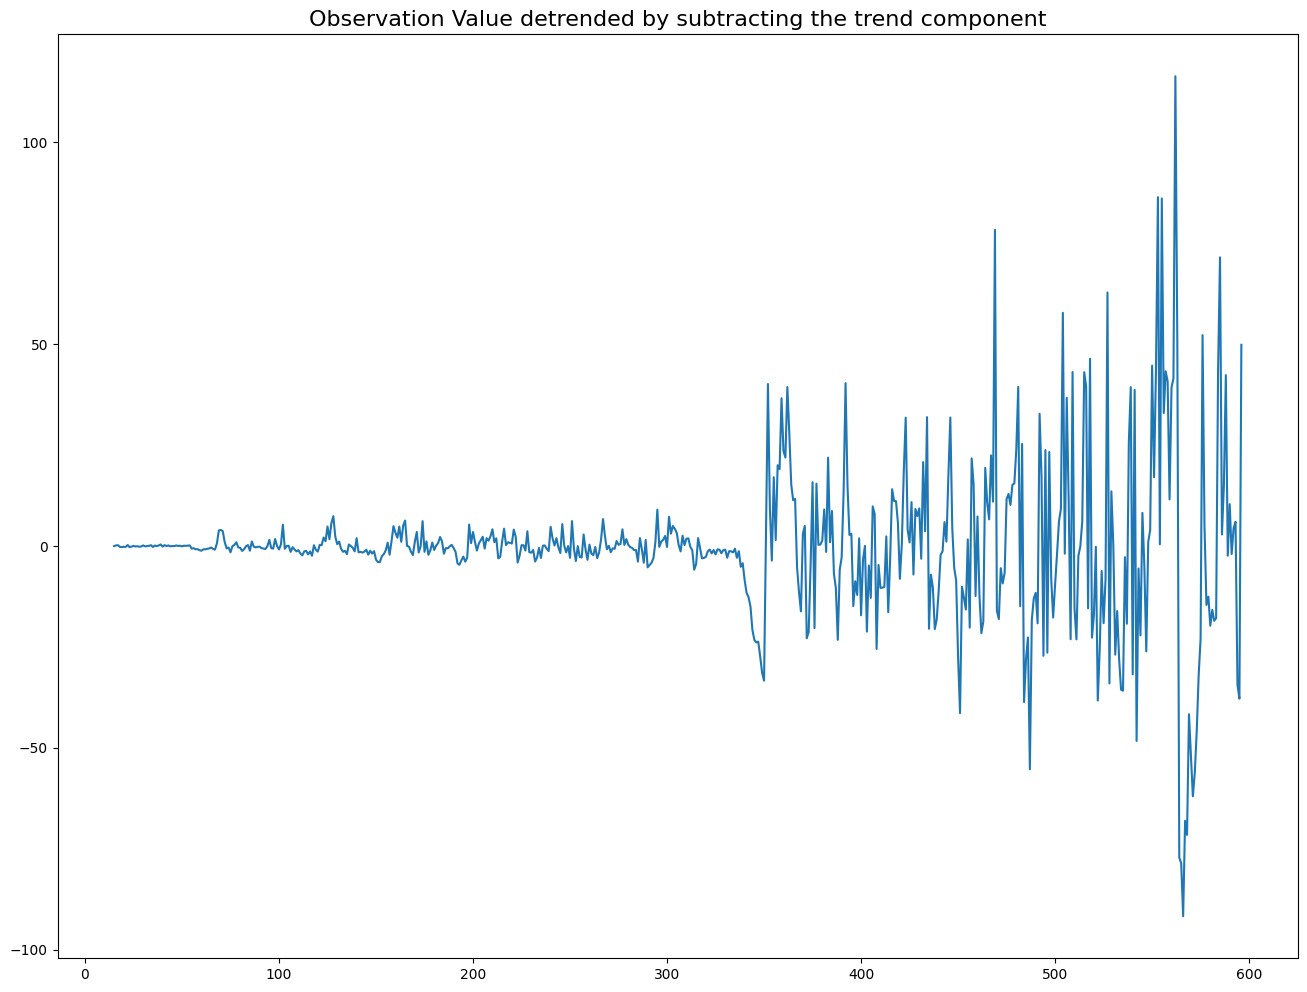

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Observation Value'], model='additive', period=30)
detrended = df['Observation Value'].values - result_mul.trend
plt.plot(detrended)
plt.title('Observation Value detrended by subtracting the trend component', fontsize=16)

[]

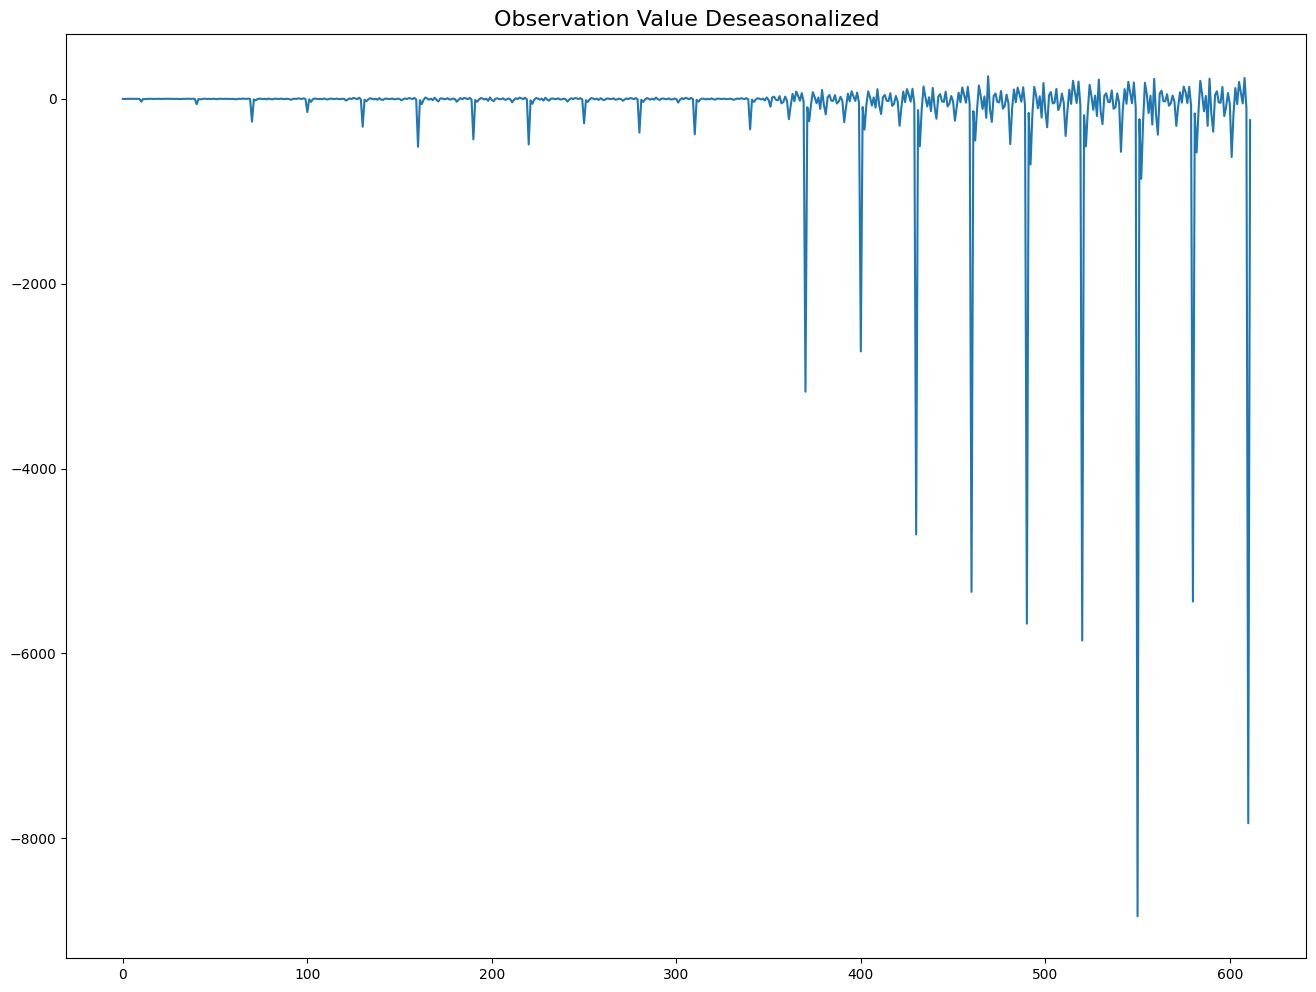

In [15]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['Observation Value'], model='additive', period=30)


# Deseasonalize
deseasonalized = df['Observation Value'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Observation Value Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

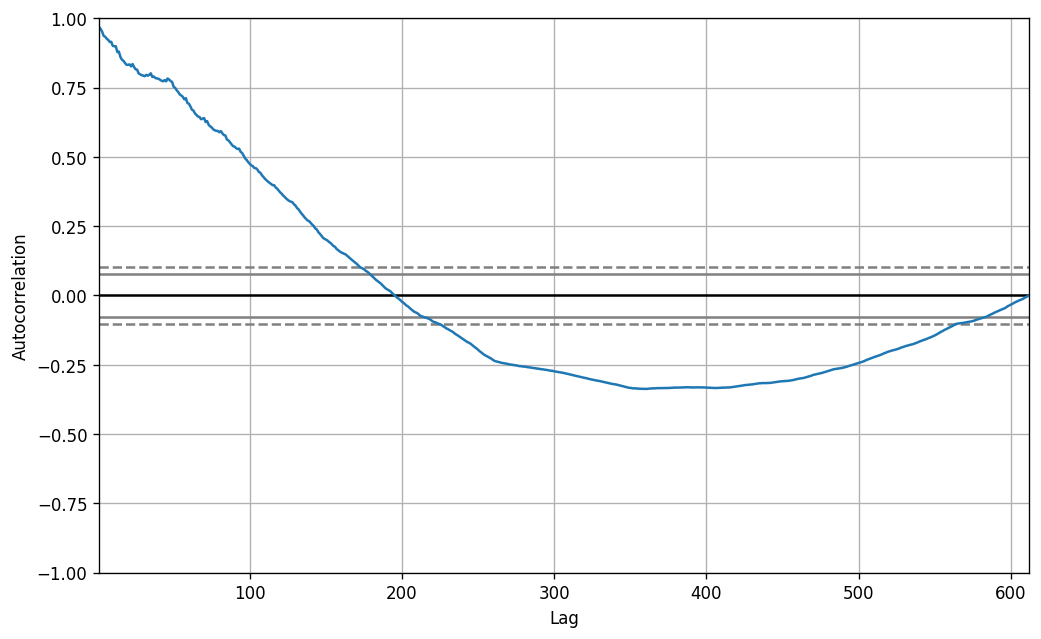

In [16]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Observation Value'].tolist())

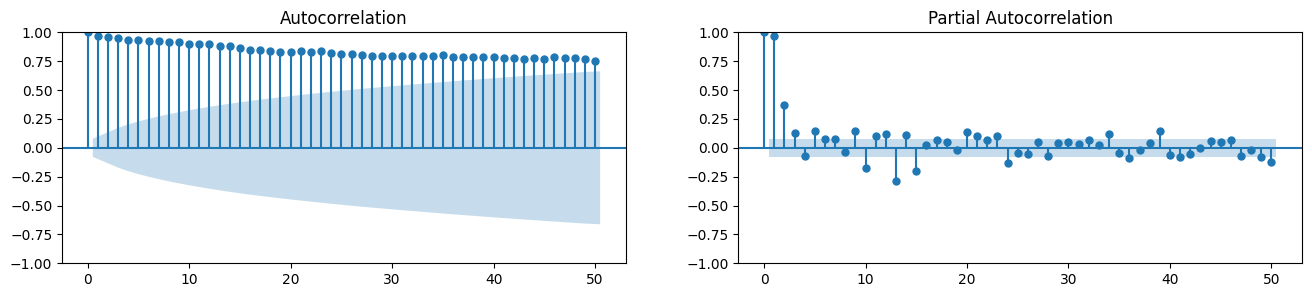

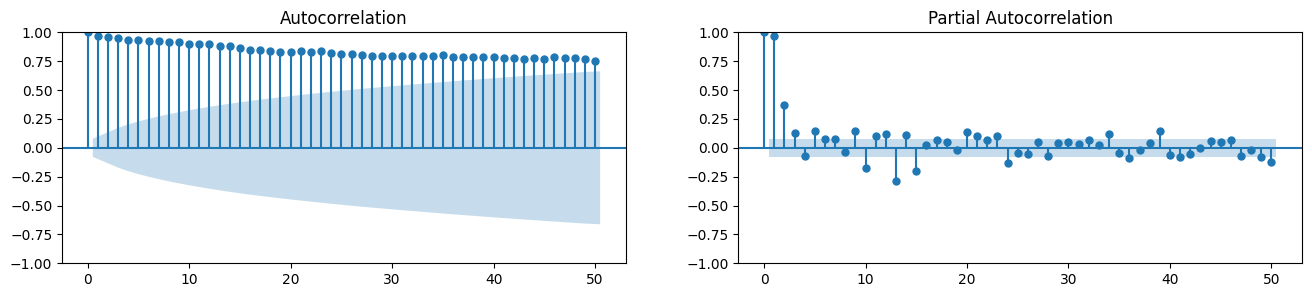

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Observation Value'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Observation Value'].tolist(), lags=50, ax=axes[1])

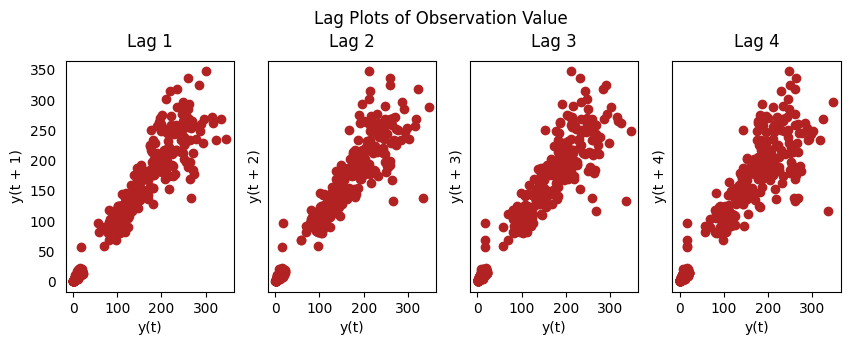

In [18]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Observation Value'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Observation Value', y=1.05)    
plt.show()

Coefficients: const                    0.656484
Observation Value.L1     0.558695
Observation Value.L2     0.276922
Observation Value.L3     0.148864
Observation Value.L4    -0.055215
                           ...   
Observation Value.L66   -0.058846
Observation Value.L67    0.039006
Observation Value.L68    0.015925
Observation Value.L69   -0.180958
Observation Value.L70    0.107511
Length: 71, dtype: float64
Test RMSE: 81.086


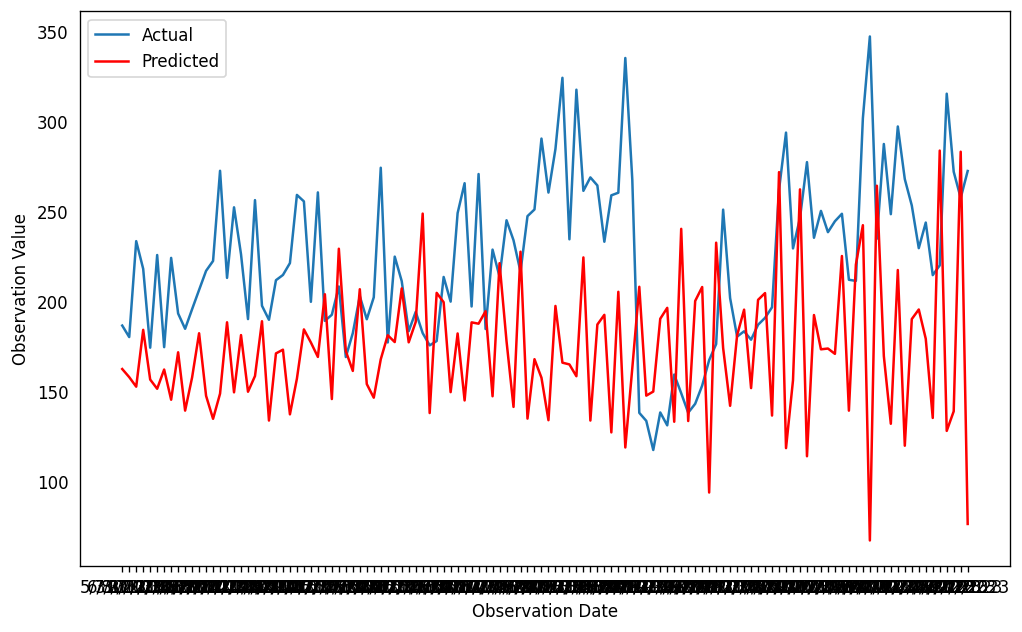

In [19]:
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Extract the observation date and observation value columns
X = df['Observation Date']
y = df['Observation Value']

# Split the data into training and test sets
train_size = int(0.8 * len(df))  # Adjust the split ratio as needed
train_X, test_X = X[:train_size], X[train_size + 1:]
train_y, test_y = y[:train_size], y[train_size + 1:]

# Fit the AutoRegressive model
model = AutoReg(train_y, lags=70)  # Specify the desired number of lags
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, dynamic=False)

# Reset the index of test_y
test_y = test_y.reset_index(drop=True)

# Compare the predicted values with the actual values
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], test_y[i]))

# Calculate RMSE to evaluate the model's performance
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot the actual values (test data) and the predicted values
plt.plot(test_X, test_y, label='Actual')
plt.plot(test_X, predictions, color='red', label='Predicted')
plt.xlabel('Observation Date')
plt.ylabel('Observation Value')
plt.legend()
plt.show()


In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Create and fit the ARIMA model
model = ARIMA(df, order=(0, 2, 2))
results_ARIMA = model.fit()

# Print the summary of the ARIMA model
print(results_ARIMA.summary())





c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Observation Value   No. Observations:                  612
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -2659.852
Date:                Mon, 17 Jul 2023   AIC                           5325.704
Time:                        01:35:51   BIC                           5338.944
Sample:                    07-31-1972   HQIC                          5330.854
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5310      0.033    -45.753      0.000      -1.597      -1.465
ma.L2          0.5312      0.020     26.208      0.000       0.491       0.571
sigma2       354.1516     15.255     23.216      0.0

In [51]:

results_ARIMA.forecast(3)


2023-07-31    268.746596
2023-08-31    269.187569
2023-09-30    269.628542
Freq: M, Name: predicted_mean, dtype: float64

Forecasted Values:
2023-07-31    268.746596
2023-08-31    269.187569
2023-09-30    269.628542
2023-10-31    270.069515
2023-11-30    270.510488
2023-12-31    270.951460
2024-01-31    271.392433
2024-02-29    271.833406
2024-03-31    272.274379
2024-04-30    272.715352
Freq: M, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Observation Value  upper Observation Value
2023-07-31               231.838231               305.654961
2023-08-31               228.401943               309.973195
2023-09-30               225.292270               313.964814
2023-10-31               222.436116               317.702914
2023-11-30               219.784021               321.236955
2023-12-31               217.300679               324.602242
2024-01-31               214.959850               327.825016
2024-02-29               212.741404               330.925409
2024-03-31               210.629497               333.919261
2024-04-30               208.611400               336

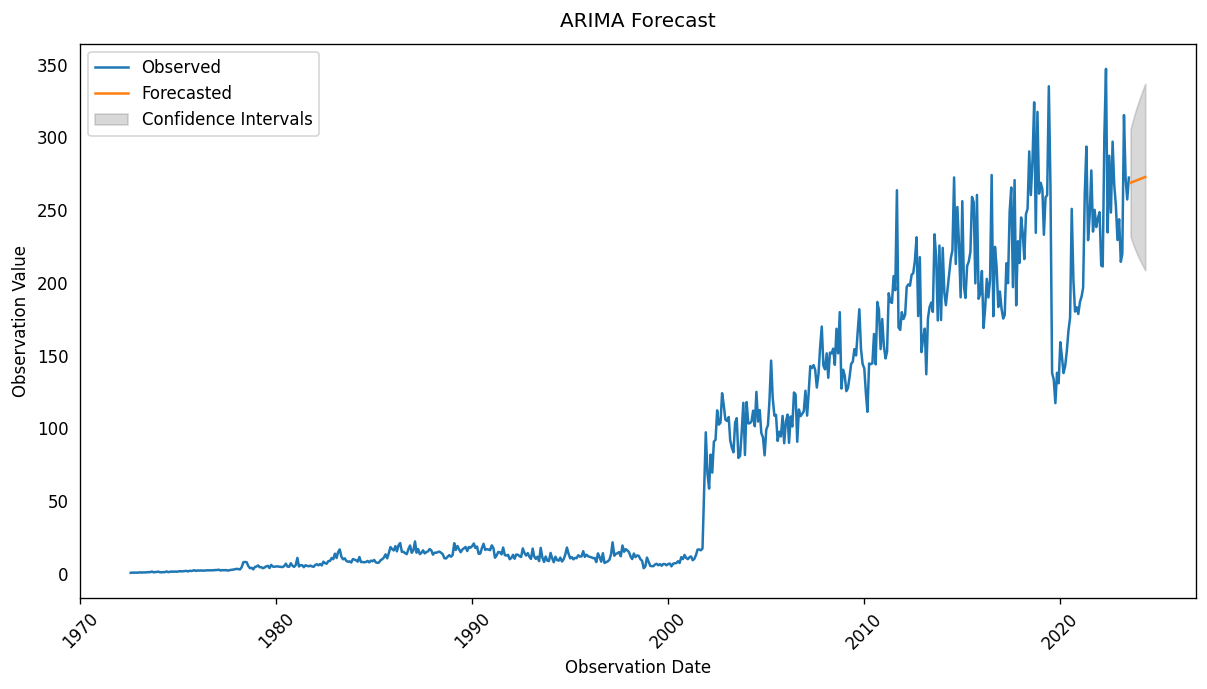

In [52]:
forecast = results_ARIMA.get_forecast(steps=10)

# Extract the forecasted values and their confidence intervals
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("Forecasted Values:")
print(forecast_values)

print("Confidence Intervals:")
print(confidence_interval)

# Plot the observed values, forecasted values, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Observation Value'], label='Observed')
plt.plot(forecast_values.index, forecast_values, label='Forecasted')
plt.fill_between(
    confidence_interval.index,
    confidence_interval['lower Observation Value'],
    confidence_interval['upper Observation Value'],
    alpha=0.3,
    color='gray',
    label='Confidence Intervals'
)
plt.xlabel('Observation Date')
plt.ylabel('Observation Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.show()